# Import Libraries

In [2]:
from urllib import request, parse
import pandas as pd

# Get Data From Socrata

SoQL document can be found [here](https://dev.socrata.com/docs/functions/)

More about the datasets:
- [Automated Traffic Volume Counts](https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt)
- [Annual Average Daily Traffic (AADT)](https://data.ny.gov/Transportation/Annual-Average-Daily-Traffic-AADT-Beginning-1977/6amx-2pbv)

In [108]:
def get_from_socrata(endpoint, sql='', fname=None):
    (fpath, http_msg) = request.urlretrieve(endpoint+'?$query='+parse.quote(sql), filename=fname)
    print("File Saved as ", fpath)
    print("HTTP Message retrieved as below:", '\n', http_msg)

In [115]:
# get the automated traffic count dataset
endpoint = 'https://data.cityofnewyork.us/resource/7ym2-wayt.csv'
sql = 'select distinct segmentid, wktgeom, boro, street \
        where yr = 2015 \
        group by segmentid, wktgeom, boro, street \
        order by segmentid \
        limit 1000'
get_from_socrata(endpoint, sql=sql, fname="traffic-data/atr_1.csv")        

File Saved as  traffic-data/atr_1.csv
HTTP Message retrieved as below: 
 Server: nginx
Date: Sun, 30 Jul 2023 09:15:55 GMT
Content-Type: text/csv; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Access-Control-Allow-Origin: *
ETag: W/"YnJhdm8uNDIyNjA5XzNfMzVjYVp5QW1ZT2lMdFFQREZOQVRXQ0steEtOc00---gziou91bHPOZG5TbcYKCqgFWEtUNGzw--gzip--gzip"
X-SODA2-Fields: ["segmentid","wktgeom","boro","street"]
X-SODA2-Types: ["number","text","text","text"]
X-SODA2-Data-Out-Of-Date: false
X-SODA2-Truth-Last-Modified: Thu, 29 Dec 2022 21:13:19 GMT
X-SODA2-Secondary-Last-Modified: Thu, 29 Dec 2022 21:13:19 GMT
Last-Modified: Thu, 29 Dec 2022 21:13:19 GMT
Vary: Accept-Encoding
Age: 10
X-Socrata-Region: aws-us-east-1-fedramp-prod
Strict-Transport-Security: max-age=31536000; includeSubDomains
X-Socrata-RequestId: 4dbc8c37939ac42ae2df56b2629cf9db




In [127]:
# get the metadata for RAT dataset
endpoint = 'https://data.cityofnewyork.us/api/views/metadata/v1/7ym2-wayt'
with request.urlopen(endpoint) as meta:
    k = meta.read()
print(k)

b'{\n  "id" : "7ym2-wayt",\n  "name" : "Automated Traffic Volume Counts",\n  "attribution" : null,\n  "attributionLink" : null,\n  "category" : "Transportation",\n  "createdAt" : "2021-08-31T20:38:52+0000",\n  "dataUpdatedAt" : "2022-12-29T21:47:17+0000",\n  "dataUri" : "https://data.cityofnewyork.us/resource/7ym2-wayt",\n  "description" : "New York City Department of Transportation (NYC DOT) uses Automated Traffic Recorders (ATR) to collect traffic sample volume counts at bridge crossings and roadways.These counts do not cover the entire year, and the number of days counted per location may vary from year to year.",\n  "domain" : "data.cityofnewyork.us",\n  "externalId" : null,\n  "hideFromCatalog" : false,\n  "hideFromDataJson" : false,\n  "license" : null,\n  "metadataUpdatedAt" : "2023-01-20T22:00:26+0000",\n  "provenance" : "OFFICIAL",\n  "updatedAt" : "2023-01-20T22:00:26+0000",\n  "webUri" : "https://data.cityofnewyork.us/d/7ym2-wayt",\n  "approvals" : [ {\n    "reviewedAt" : 16

In [60]:
# get the AADT dataset
endpoint = "https://data.ny.gov/resource/6amx-2pbv.csv"
sql = 'select * \
    where aadt_year = "2015" and county in ("Queens", "Kings", "Richmond", "Bronx", "New York")  and count is not NULL\
    limit 10000'
get_from_socrata(endpoint, sql = sql, fname = "traffic-data/aadt_1.csv")


File Saved as  traffic-data/aadt_1.csv
HTTP Message retrieved as below: 
 Server: nginx
Date: Sun, 30 Jul 2023 07:05:50 GMT
Content-Type: text/csv; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Access-Control-Allow-Origin: *
ETag: W/"YWxwaGEuODE0OV81XzExNjN5YVFEaF9mNFo5V2pJQVdtWVpsdWJwTDl0bw---gzik2U8v-OjSY3JdH8KXe7w92uiHLX--gzip--gzip"
X-SODA2-Fields: ["aadt_year","station_id","county","signing","state_route","county_road","road_name","beginning_description","ending_description","municipality","length","fc","ramp","bridge","rr_xing","oneway","count"]
X-SODA2-Types: ["text","number","text","text","text","text","text","text","text","text","number","number","text","text","text","text","number"]
X-SODA2-Data-Out-Of-Date: false
X-SODA2-Truth-Last-Modified: Tue, 04 Feb 2020 22:07:45 GMT
X-SODA2-Secondary-Last-Modified: Tue, 04 Feb 2020 22:07:45 GMT
Last-Modified: Tue, 04 Feb 2020 22:07:45 GMT
Vary: Accept-Encoding
Age: 0
X-Socrata-Region: aws-us-east-1-fedramp-prod
Strict-Tran

# Import ATR Data

In [116]:
atr = pd.read_csv("traffic-data/atr_1.csv")
print(atr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   segmentid  1000 non-null   int64 
 1   wktgeom    1000 non-null   object
 2   boro       1000 non-null   object
 3   street     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


In [118]:
atr.tail()

,segmentid,wktgeom,boro,street
995,59033,POINT (1043490.2197884223 182400.34418568562),Queens,NORTH CONDUIT AVENUE
996,59034,POINT (1043359.1297855886 182448.4068133),Queens,BAISLEY BOULEVARD SOUTH
997,59057,POINT (1043569.0341953558 183600.40809464533),Queens,BAISLEY BOULEVARD SOUTH
998,59237,POINT (1044503.6677697763 188487.0459776001),Queens,GUY R BREWER BOULEVARD
999,59355,POINT (1045385.7257368852 186558.56922030088),Queens,GUY R BREWER BOULEVARD


# Import  AADT Data

In [61]:
traffic = pd.read_csv("traffic-data/aadt_1.csv")
print(traffic.info())
print(traffic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   aadt_year              1697 non-null   int64  
 1   station_id             1697 non-null   int64  
 2   county                 1697 non-null   object 
 3   signing                32 non-null     object 
 4   state_route            40 non-null     object 
 5   county_road            0 non-null      float64
 6   road_name              1696 non-null   object 
 7   beginning_description  1696 non-null   object 
 8   ending_description     1695 non-null   object 
 9   municipality           1537 non-null   object 
 10  length                 1697 non-null   int64  
 11  fc                     1697 non-null   int64  
 12  ramp                   101 non-null    object 
 13  bridge                 90 non-null     object 
 14  rr_xing                1 non-null      object 
 15  onew

In [62]:
traffic.head()

,aadt_year,station_id,county,signing,state_route,county_road,road_name,beginning_description,ending_description,municipality,length,fc,ramp,bridge,rr_xing,oneway,count
0,2015,10004,Bronx,US,1,NaN,WEBSTER AVE,END I-95/US1 OLAP WEBSTER AV,E FORDHAM RD,Bronx,151,14,NaN,NaN,NaN,NaN,17188.0
1,2015,10009,Bronx,US,1,NaN,BOSTON RD,RT 22 PROVOST AVE,Bronx/West Co Line,Bronx,51,14,NaN,Y,NaN,NaN,22471.0
2,2015,10012,Bronx,US,9,NaN,BROADWAY,START 9/9A OLAP H.H. PKY,Bronx/West Co Line,Bronx,80,14,NaN,NaN,NaN,NaN,11876.0
3,2015,10014,Bronx,NY,9A,NaN,HENRY HUDSON PK,NY/Bronx Co Line,RIVERDALE AVE OVER,Bronx,104,12,NaN,Y,NaN,NaN,63544.0
4,2015,10043,Bronx,Interstate,278,NaN,Robert F. Kenne,NY/Bronx Co Line,I-87 MAJOR DEEGAN EXPWY EXIT,Bronx,21,11,NaN,Y,NaN,NaN,84220.0


In [41]:
for county in ["Queens", "Kings", "Richmond", "Bronx", "New York"]:
    print(f"{county} is {'not ' if county not in traffic.county.values else ''}in list")

Queens is in list
Kings is in list
Richmond is in list
Bronx is in list
New York is in list


In [59]:
traffic[~traffic["count"].isna()].value_counts("county")

county
Queens      657
Kings       397
New York    291
Bronx       192
Richmond    160
Name: count, dtype: int64

In [96]:
traffic.query('bridge == "Y" & ramp == "Y"')

,aadt_year,station_id,county,signing,state_route,county_road,road_name,beginning_description,ending_description,municipality,length,fc,ramp,bridge,rr_xing,oneway,count
971,2015,53096,Queens,NaN,NaN,NaN,907M at Exit 9,907M WB (OFF),NY25A WB (ON),Queens,29,12,Y,Y,NaN,Y,11316.0
993,2015,53139,Queens,NaN,NaN,NaN,Ny878 at JFK Ex,NY878 EB (OFF),JFK EXPR NB (ON),Queens,44,11,Y,Y,NaN,Y,3743.0
1006,2015,53157,Queens,NaN,NaN,NaN,I278 Exit 40,I278 WB (OFF),BROADWAY,Queens,16,11,Y,Y,NaN,Y,21666.0
1010,2015,53163,Queens,NaN,NaN,NaN,I278 Exit 42 &,30TH AVE,I278 WB (ON),Queens,21,11,Y,Y,NaN,Y,6651.0
1028,2015,53190,Queens,NaN,NaN,NaN,I678 at JFK Air,I678 SB (OFF),JFK AIRPORT,Queens,44,11,Y,Y,NaN,Y,21646.0
1030,2015,53193,Queens,NaN,NaN,NaN,I678 at JFK Air,JFK AIRPORT,I678 NB (ON),Queens,20,11,Y,Y,NaN,Y,21602.0
1040,2015,53207,Queens,NaN,NaN,NaN,I678 Exit 1 NY8,FROM I678 NB&SB OFF,907D EB (ON),Queens,57,11,Y,Y,NaN,Y,21830.0


In [72]:
traffic.describe()

,aadt_year,station_id,county_road,length,fc,count
count,1697.0,1697.000000,0.0,1697.000000,1697.000000,1697.000000
mean,2015.0,41859.568061,NaN,33.919269,16.839717,5988.781968
std,0.0,16398.528293,NaN,36.055888,2.033389,15104.140014
min,2015.0,10004.000000,NaN,2.000000,11.000000,3.000000
25%,2015.0,24318.000000,NaN,12.000000,16.000000,910.000000
50%,2015.0,44286.000000,NaN,22.000000,17.000000,2205.000000
75%,2015.0,54389.000000,NaN,44.000000,19.000000,5907.000000
max,2015.0,65232.000000,NaN,495.000000,19.000000,276476.000000


<Axes: ylabel='Frequency'>

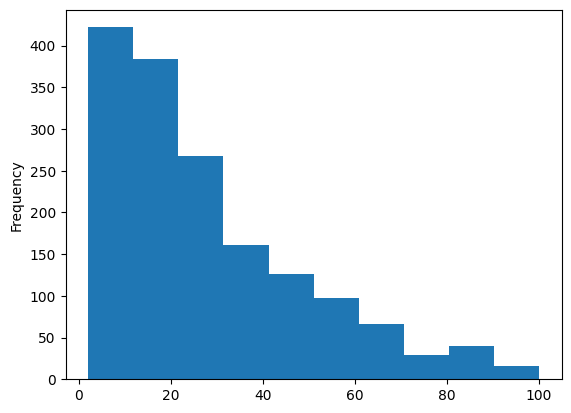

In [80]:
traffic.query('length <= 100')["length"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

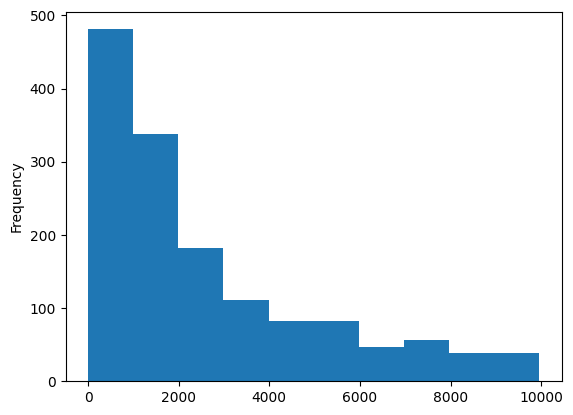

In [74]:
traffic.query('count <= 10000')["count"].plot(kind = "hist")

<Axes: >

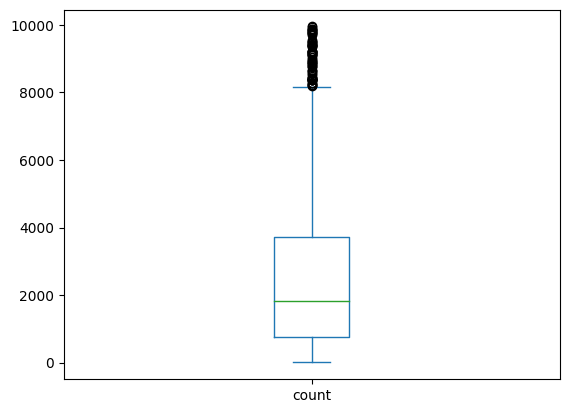

In [77]:
traffic.query('count <= 10000')["count"].plot(kind = "box")

# Data Cleaning

## Convert SPC to Lat&Lon

[Documentation for Convetor API](https://www.ngs.noaa.gov/web_services/ncat/spc-service.shtml)